In [609]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [610]:
#Main task is to create a depreciation classifier to identify the factors affecting resale value after 4years.
car_sales = pd.read_csv("Car_sales.csv")

In [611]:
car_sales = car_sales.rename(columns={'Sales in thousands': 'Sales_in_thousands',
                             '4-year resale value': 'Resale_value',
                             'Vehicle type':'Vehicle_type', 
                              'Price in thousands' : 'Price_in_thousands',
                              'Engine size': 'Engine_size', 
                              'Wheelbase Width': 'Wheelbase_width',
                              'Curb weight': 'Curb_weight',
                              'Fuel capacity': 'Fuel_capacity',
                              'Fuel efficiency': 'Fuel_efficiency',
                              'Latest Launch': 'Latest_launch'
                             })

manufacturer = pd.DataFrame()

In [612]:
car_sales = car_sales.replace('.', np.nan)
car_sales = car_sales.drop('Latest_launch', axis=1)
car_sales = car_sales.drop('Model', axis=1)

In [613]:
car_sales['Sales_in_thousands'] = pd.to_numeric(car_sales['Sales_in_thousands'])
car_sales['Price_in_thousands'] = pd.to_numeric(car_sales['Price_in_thousands'])
car_sales['Engine_size'] = pd.to_numeric(car_sales['Engine_size'])
car_sales['Horsepower'] = pd.to_numeric(car_sales['Horsepower'])
car_sales['Wheelbase'] = pd.to_numeric(car_sales['Wheelbase'])
car_sales['Width'] = pd.to_numeric(car_sales['Width'])
car_sales['Length'] = pd.to_numeric(car_sales['Length'])
car_sales['Curb_weight'] = pd.to_numeric(car_sales['Curb_weight'])
car_sales['Fuel_capacity'] = pd.to_numeric(car_sales['Fuel_capacity'])
car_sales['Fuel_efficiency'] = pd.to_numeric(car_sales['Fuel_efficiency'])
car_sales['Resale_value'] = pd.to_numeric(car_sales['Resale_value'])

In [614]:
Y = car_sales['Manufacturer']

In [615]:
#creating a correlation matrix
corrmat = car_sales.corr()

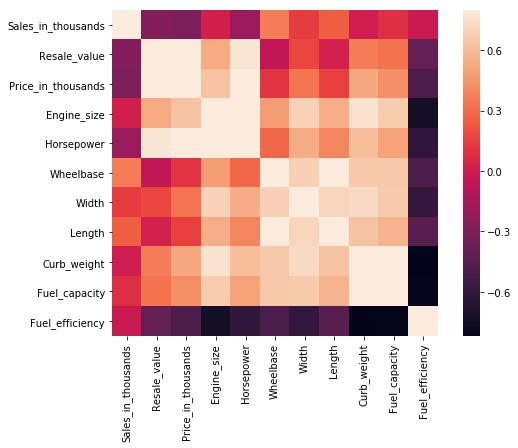

In [616]:
#Find correlation between the different variables.
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [617]:
#Removing fuel efficiency, as it's highly correlated to engine_size and curb_weight
car_sales = car_sales.drop('Fuel_efficiency', axis=1)

#Drop resale value as it's related to px.
car_sales = car_sales.drop('Resale_value', axis=1)

In [618]:
car_sales.isnull().any()

Manufacturer          False
Sales_in_thousands    False
Vehicle_type          False
Price_in_thousands     True
Engine_size            True
Horsepower             True
Wheelbase              True
Width                  True
Length                 True
Curb_weight            True
Fuel_capacity          True
dtype: bool

In [619]:
#Replacing NA values 
#Removing rows with >2 NA values
car_sales = car_sales.dropna(thresh=2)


#Replacing with mean values
car_sales['Engine_size'].fillna((car_sales['Engine_size'].mean()), inplace=True)
car_sales['Horsepower'].fillna((car_sales['Horsepower'].mean()), inplace=True)
car_sales['Wheelbase'].fillna((car_sales['Wheelbase'].mean()), inplace=True)
car_sales['Width'].fillna((car_sales['Width'].mean()), inplace=True)
car_sales['Length'].fillna((car_sales['Length'].mean()), inplace=True)
car_sales['Curb_weight'].fillna((car_sales['Curb_weight'].mean()), inplace=True)
car_sales['Fuel_capacity'].fillna((car_sales['Fuel_capacity'].mean()), inplace=True)
car_sales['Price_in_thousands'].fillna(method='ffill', inplace=True)

In [620]:
car_sales['Vehicle_type'] = np.where(car_sales['Vehicle_type'] == 'Passenger', 1, 0)

In [621]:
car_sales.isnull().any()

Manufacturer          False
Sales_in_thousands    False
Vehicle_type          False
Price_in_thousands    False
Engine_size           False
Horsepower            False
Wheelbase             False
Width                 False
Length                False
Curb_weight           False
Fuel_capacity         False
dtype: bool

In [622]:
car_sales.dtypes

Manufacturer           object
Sales_in_thousands    float64
Vehicle_type            int64
Price_in_thousands    float64
Engine_size           float64
Horsepower            float64
Wheelbase             float64
Width                 float64
Length                float64
Curb_weight           float64
Fuel_capacity         float64
dtype: object

In [651]:
columns = ['Sales_in_thousands', 'Engine_size', 'Manufacturer', 'Vehicle_type', 'Width', 'Curb_weight', 'Length']
X = car_sales.drop(columns, axis=1)

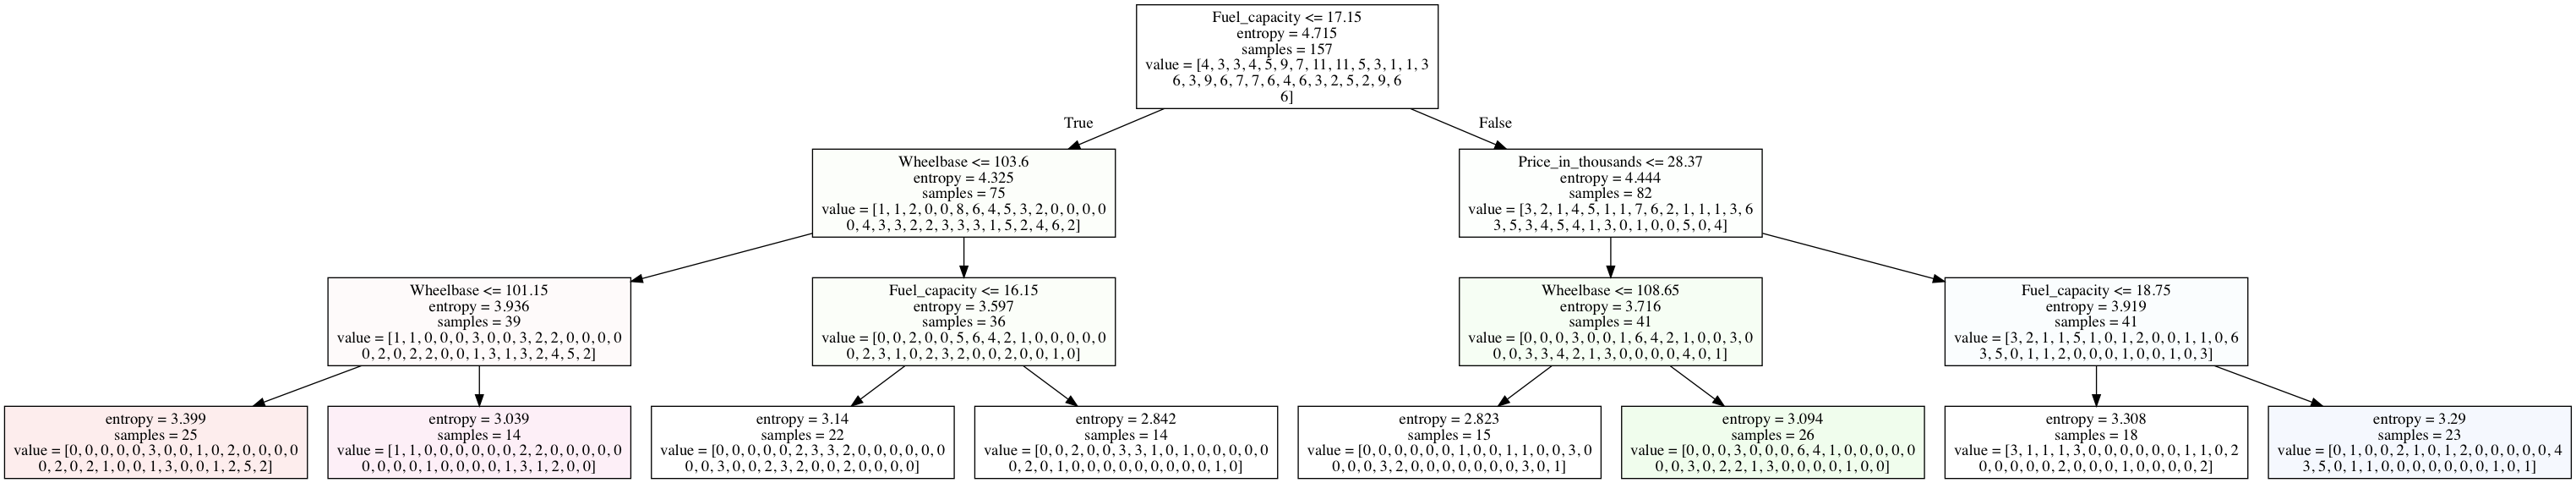

In [652]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())


In [657]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X, Y, cv=10)

#Looks hard to predict the manufacturer as cars are mostly similar! 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([ 0.21875   ,  0.35714286,  0.23076923,  0.2       ,  0.29411765,
        0.14285714,  0.375     ,  0.2       ,  0.4       ,  0.        ])

In [ ]:
#Using Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity
#array([ 0.1875    ,  0.28571429,  0.26923077,  0.2       ,  0.29411765,
        0.21428571,  0.125     ,  0.2       ,  0.2       ,  0.        ])
    
#Using Price_in_thousands, Horsepower, Wheelbase, Length, Curb_weight, Fuel_capacity
#array([ 0.15625   ,  0.28571429,  0.23076923,  0.25      ,  0.35294118,
        0.14285714,  0.125     ,  0.        ,  0.2       ,  0.        ])

#Using Price_in_thousands, Horsepower, Wheelbase, Length, Curb_weight, Fuel_capacity, Curb_weight, Length
#array([ 0.1875    ,  0.14285714,  0.19230769,  0.3       ,  0.23529412,
        0.21428571,  0.25      ,  0.2       ,  0.2       ,  0.        ])